In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import os
import sklearn
from joblib import dump,load

In [2]:
#Read the file and save as data frame
data = pd.read_csv('kc_house_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#To check the presence of null values
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

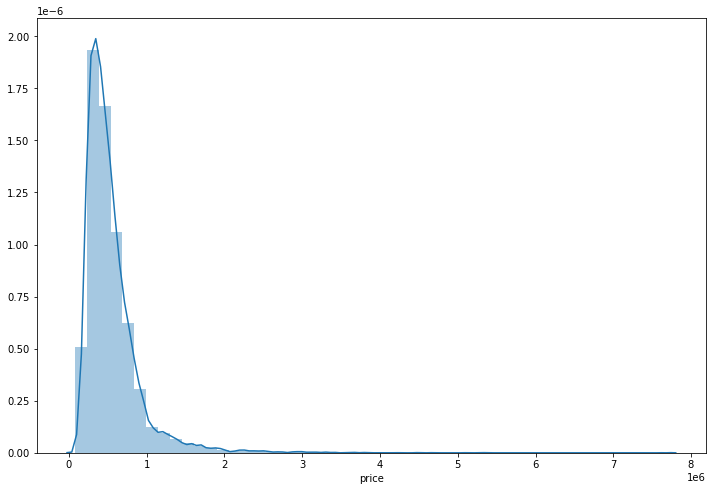

In [5]:
plt.figure(figsize=(12,8))
sns.distplot(data['price'])

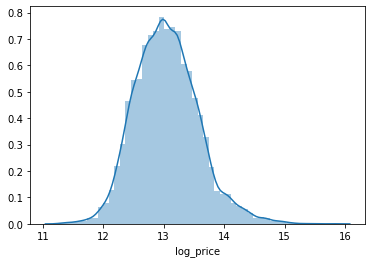

In [6]:
#Log Transformation of Price column to remove right skewness and become normally distributed. Done to remove effect of outliers.
data['log_price'] = np.log(data.price)
sns.distplot(data['log_price'])
plt.show()

In [7]:
#Remove features that are not required for training
#data = data.drop('id',axis = 1)
data = data.drop('date',axis = 1)

In [8]:
data.shape

(21597, 21)

In [9]:
data.yr_built = data.yr_built.astype(str)
data.yr_renovated = data.yr_renovated.astype(str)

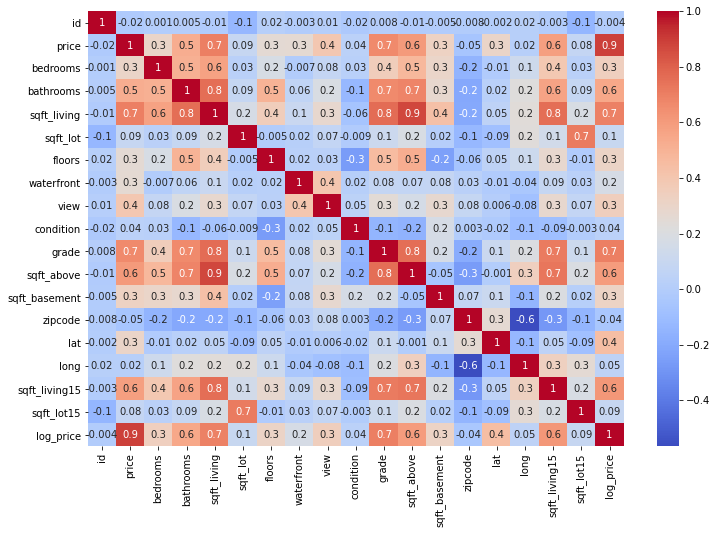

In [10]:
#Correlation
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot = True, fmt = '.1g', cmap = 'coolwarm')

In [11]:
data = data.drop(['id','zipcode','sqft_above','sqft_lot15','sqft_living15'],axis=1)

## TRAIN TEST SPLIT

In [12]:
X = data.drop(['price','log_price'],axis=1)

y = data['log_price']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21597 non-null  int64  
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   sqft_lot       21597 non-null  int64  
 4   floors         21597 non-null  float64
 5   waterfront     21597 non-null  int64  
 6   view           21597 non-null  int64  
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_basement  21597 non-null  int64  
 10  yr_built       21597 non-null  object 
 11  yr_renovated   21597 non-null  object 
 12  lat            21597 non-null  float64
 13  long           21597 non-null  float64
dtypes: float64(4), int64(8), object(2)
memory usage: 2.3+ MB


## SCALING

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_test.shape

(6480, 14)

In [18]:
X_train.shape

(15117, 14)

## MACHINE LEARNING MODEL

## GRADIENT BOOST

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

In [20]:
GB = GradientBoostingRegressor(learning_rate = 0.02, subsample = 0.5, n_estimators = 1500, max_depth = 6)
GB.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=6, n_estimators=1500,
                          subsample=0.5)

In [21]:
GB_predictions = GB.predict(X_test)

In [22]:
from sklearn import metrics

In [23]:
print('GB_MAE:', metrics.mean_absolute_error(y_test, GB_predictions))
print('GB_MSE:', metrics.mean_squared_error(y_test, GB_predictions))
print('GB_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, GB_predictions)))

GB_MAE: 0.11356638341715775
GB_MSE: 0.02602767738671155
GB_RMSE: 0.16133095607077877


In [24]:
metrics.explained_variance_score(y_test,GB_predictions)

0.9053923207034884

EXP:
    
0.904 - All features without ID, Zipcode
0.89  - No ID, Zipcode, Condition, Sqftlot_15
0.899 - No ID, Zipcode, Condition, Sqftlot_15, sqftliving_15
0.904 - No ID, Zipcode, Sqftlot_15, sqftliving_15,sqft_above

In [28]:
import joblib
joblib.dump(GB,'Data/model.jlib')

['Data/model.jlib']

In [29]:
import pickle
pickle.dump(GB,open('Data/model.pkl','wb'))